# GDS Project Data collection and proccesing

### Environment setup
+ Dokumentieren 

## Analyse
### Korrelation zwischen
+ Saisonal
+ Tageszeit (Peaks zum beispiel)
+ Wochentag
+ (Lichtverhältnisse)
+ Stadtteil
+ Beteiligte Fahrzeugtypen
### Cluster Analyse
+ K nearest or anything
### Further ideas
+ Monte Carlo test

In [1]:
# csv file laden
import geopandas as gpd

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [6]:
df = gpd.read_file("work/Exercises/gds/Data/Shapefile/Unfallorte2021_LinRef.shp")

In [18]:
df.head()
df_bike = df[df["IstRad"] == "1"]

In [19]:
df_bike.size

1864148

In [30]:
df_bike.head()

,OBJECTID,UIDENTSTLA,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,USTRZUSTAN,geometry
2,3,01210610181013902021,01,0,61,007,2021,06,13,5,...,0,0,0,1,527231.388501,5.972658e+06,9.414457,53.901645,0,POINT (527231.389 5972658.256)
3,4,01210524161013132021,01,0,53,041,2021,05,11,2,...,0,0,0,0,614902.973625,5.963897e+06,10.745101,53.810913,0,POINT (614902.974 5963896.514)
4,5,01210529152013382022,01,0,55,032,2021,05,15,7,...,0,0,0,0,617331.180263,5.996138e+06,10.794357,54.100018,0,POINT (617331.180 5996138.283)
6,7,01210512171013412021,01,0,56,037,2021,05,14,4,...,0,0,0,0,540082.958405,5.947625e+06,9.606790,53.675817,0,POINT (540082.958 5947624.890)
7,8,01210325105132862021,01,0,56,043,2021,03,06,5,...,0,0,0,0,555471.603000,5.943956e+06,9.839070,53.641432,0,POINT (555471.603 5943955.564)


In [27]:
df_bike.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

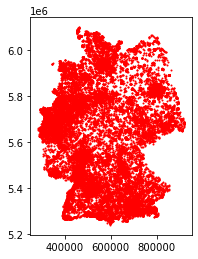

In [29]:
# plot points in df_bike
df_bike.plot(marker="o", color="red", markersize=1)

In [32]:
df_bike_hh = df_bike[df_bike["ULAND"] == "02"]

In [35]:
df_bike_hh.columns

Index(['OBJECTID', 'UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
       'IstGkfz', 'IstSonstig', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'USTRZUSTAN', 'geometry'],
      dtype='object')

In [66]:
# get districts of hamburg from shapefile
df_districts = gpd.read_file("work/Exercises/gds/Data/hh_districts/Stadtteile_Hamburg.shp")

In [67]:
df_bike_hh.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [70]:
df_districts = df_districts.to_crs("EPSG:25832")

In [42]:
# import ctx
import contextily as ctx
import matplotlib.pyplot as plt

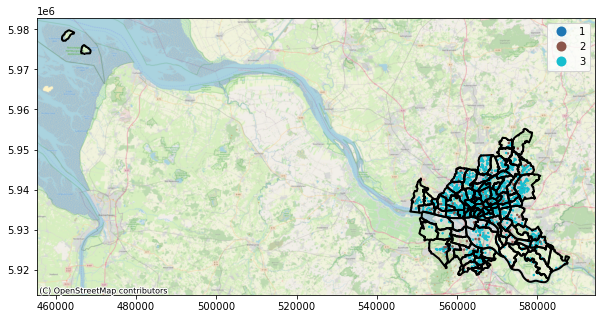

In [71]:
# color legend by 'UKATEGORIE'
fig, ax = plt.subplots(figsize=(10, 10))
df_bike_hh.plot(ax=ax, column="UKATEGORIE", legend=True, markersize=2)
# add districts
df_districts.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
# add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=df_bike_hh.crs.to_string())


### Spatial Autocorrealtion